# Project 1 : Lending Case Finance Study Analysis 

## problem Statement : 
The main objective is to be able to identify these risky loan applicants, 
then such loans can be reduced thereby cutting down the amount of credit loss. 
Identification of such applicants using EDA is the aim of this case study.

Team Member :
1. Amitesh Pandey
2. Gouse ul meera 

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
loanData = pd.read_csv("C:\\Users\\gouse\\Downloads\\loan\\loan.csv")
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loanData.shape
#indicating 39717 no of instances[Rows] over 111 no of features[columns]

(39717, 111)

## Analysis 1 : Handling the invalids data 

In [4]:
#Checking for missing values 
loanData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
#Removing features with single value which does not convey any informations
loanData.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loanData.shape

(39717, 102)

In [6]:
#Removing the NA values, as it does not convery any informations 
loanData.dropna(axis = 1, how = 'all', inplace = True)
loanData.shape

(39717, 48)

The no of columns has been reduced to 48 over 39717 no of instances, Now again checking for missing values

In [7]:
loanData.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2459
emp_length                   1075
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
url                             0
desc                        12940
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
mths_since_last_delinq      25682
mths_since_last_record      36931
open_acc      

few features does not share any informations whoes name mentioned below :
"_id" , member_id, url, title, zip_code, dti, add_state                 

In [8]:
loanData.drop(['id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'addr_state', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'last_pymnt_d', 'chargeoff_within_12_mths'], axis = 1, inplace = True)
loanData.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

In [9]:
loanData.shape

(39717, 36)

Observation made while feature selections:
1. Checking of null values
2. Removing the Least important features
3. Removing the NULL values as it dont contribute in extracting informations 

## Analysis 2 : Univariant analysis 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

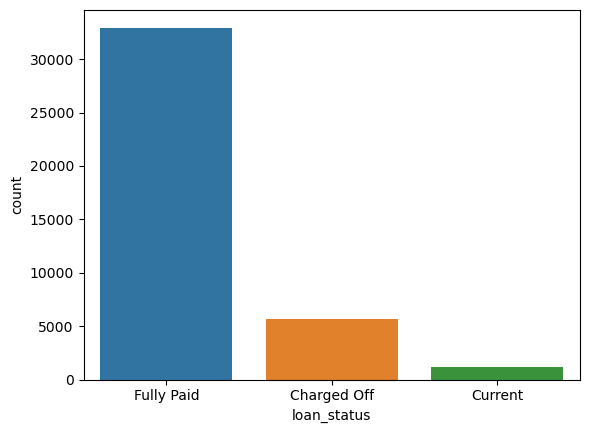

In [10]:
sns.countplot(x = 'loan_status', data = loanData)

Observation made: 
1. Based on the data, the majority people who applied for Loan does nor have any past active loans 
2. Analysis made based on the Univariant techniques [Considering only single varaibles]

## Analysis 3 : Bivariant Analysis

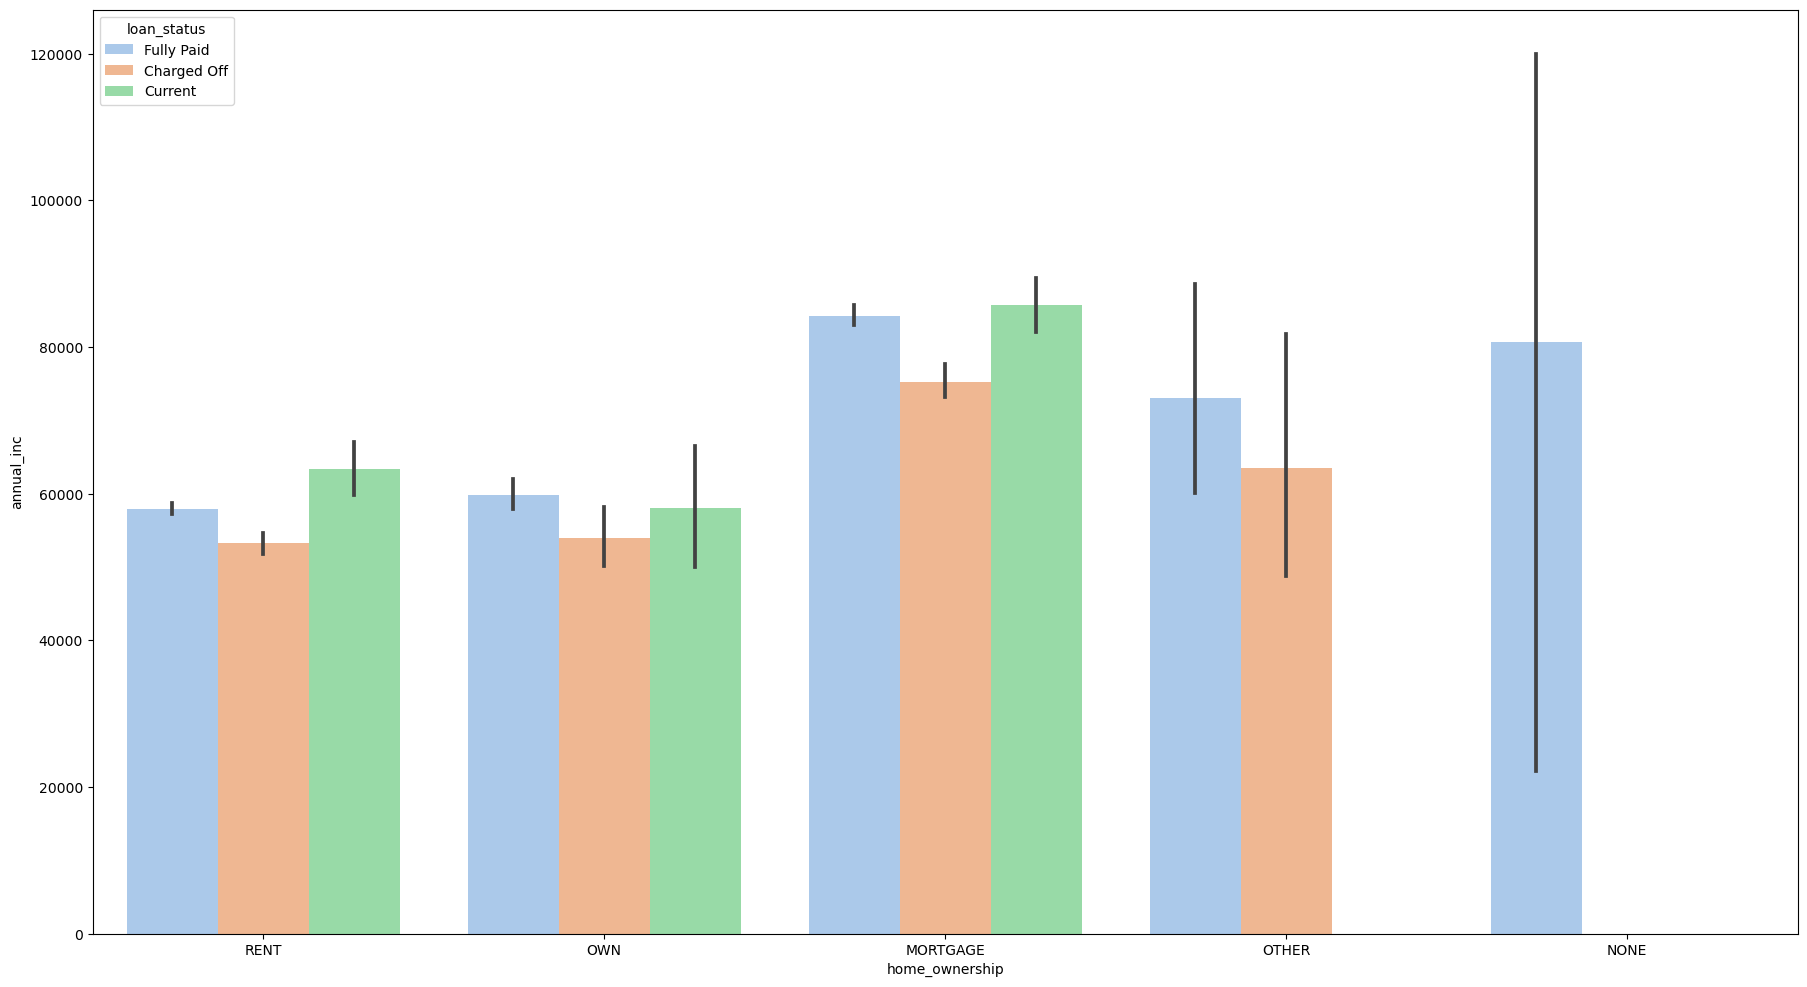

In [11]:
plt.figure(figsize=(22,12))
sns.barplot(data = loanData, x='home_ownership', y='annual_inc', hue ='loan_status', palette="pastel")
plt.show()

Observation made : 
1. High risk -> people with mortage and also charged off [ defaulters] 

## Analysis 4 : Handling Categorical data to get insights 

In [12]:
#### Label Encoding for Categorical to numberical 
labelEncoder = LabelEncoder()

loanData['verification_status'] = labelEncoder.fit_transform(loanData['verification_status'])

## Analysis 5 : VerificationStatus vs Employee Lenght over Loan Status 

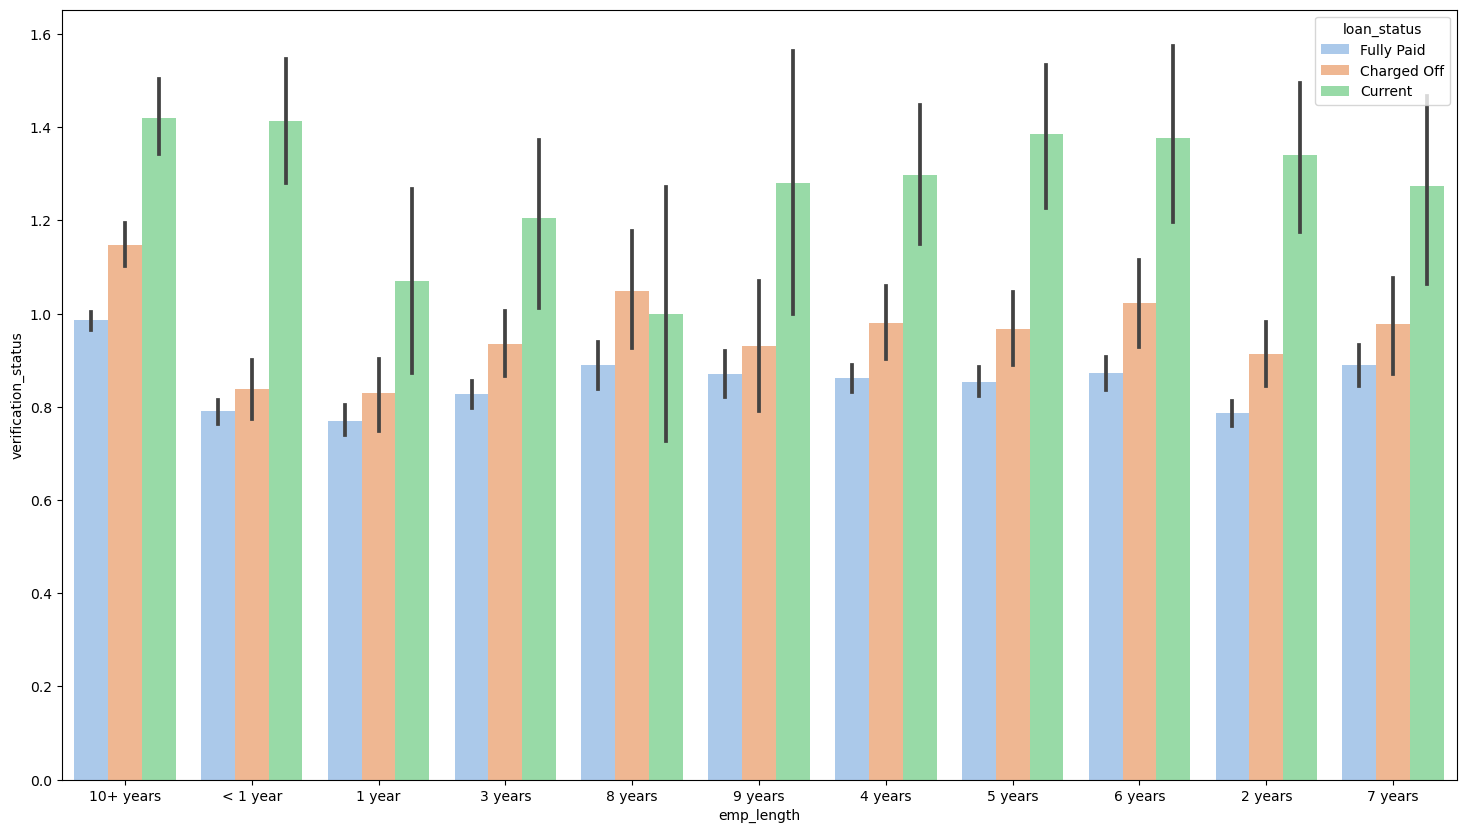

In [13]:
plt.figure(figsize = (18,10))
sns.barplot(data = loanData, y = 'verification_status', x = 'emp_length', hue ='loan_status', palette = "pastel")
plt.show()

Observations made : 
1. With increase in employ length, risk factors is for people who are in charged off [defaulters ] category


## Analysis 6 : Annual Income vs Purpose of buying loans over Loan Status 

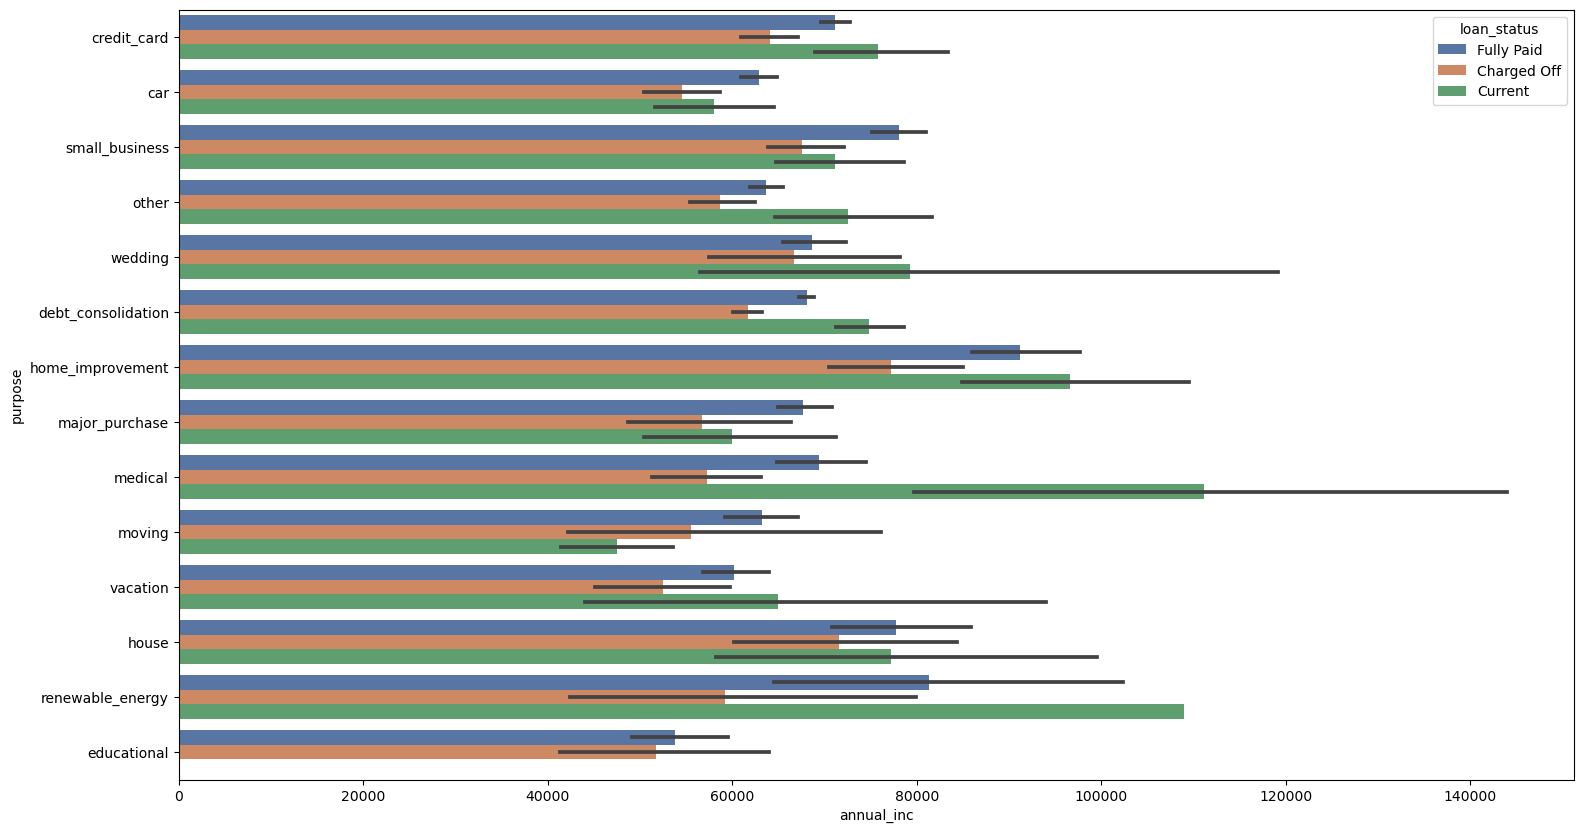

In [14]:
plt.figure(figsize=(18, 10))
sns.barplot(data = loanData, x = 'annual_inc', y = 'purpose', hue ='loan_status', palette = "deep")
plt.show()

Observation:
1. High risk -> people with less priority purpose have loanStatus as charged off [defaulters] <br>
For examples : <br>
a. Many people taking loans for vacations inspite of being defaulters in previous loans <br>
b. Many people taking loans for house improvement inspite of being defaults in previous loans <br>
c. Many people taking loans for car inspite of being defaults in previous loans <br>

## Analysis 7 : Term vs loan_amount over Loan Status 

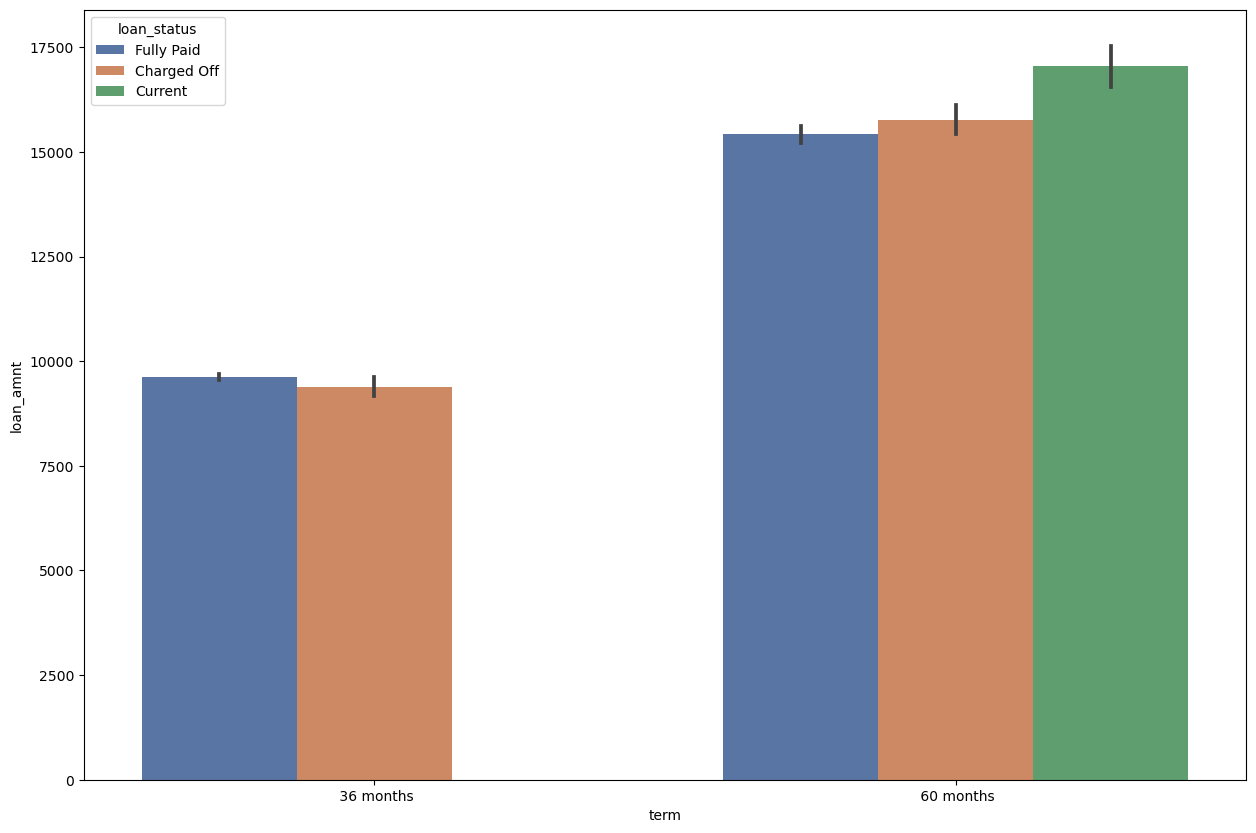

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(data = loanData, x = 'term', y = 'loan_amnt', hue ='loan_status', palette = "deep")
plt.show()

Observations made:
1. Majority poeple have taken loan with longer months with more amounts . Let us see their rate of interest on next observations.